In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
data = pd.read_csv("D:\\house price prediciton\\archive (7)\\Housing.csv")

In [3]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
from sklearn.model_selection import train_test_split

x = data.drop(['price'], axis=1)
y = data['price']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)


In [7]:
train_data = x_train.join(y_train)


In [8]:
train_data

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
282,2175,3,1,2,no,yes,yes,no,yes,0,no,unfurnished,4270000
353,2856,3,1,3,yes,no,no,no,no,0,yes,furnished,3780000
393,7424,3,1,1,no,no,no,no,no,0,no,unfurnished,3500000
508,4400,2,1,1,yes,no,no,no,no,0,no,unfurnished,2590000
489,3300,3,1,2,no,no,no,no,no,1,no,semi-furnished,2835000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,5000,3,1,3,yes,no,no,no,yes,0,no,semi-furnished,5740000
82,10500,3,2,1,yes,no,yes,no,yes,1,yes,furnished,6615000
213,4995,4,2,1,yes,no,yes,no,no,0,no,semi-furnished,4893000
488,5200,4,1,3,yes,no,no,no,no,0,no,unfurnished,2852500


array([[<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'stories'}>],
       [<Axes: title={'center': 'parking'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

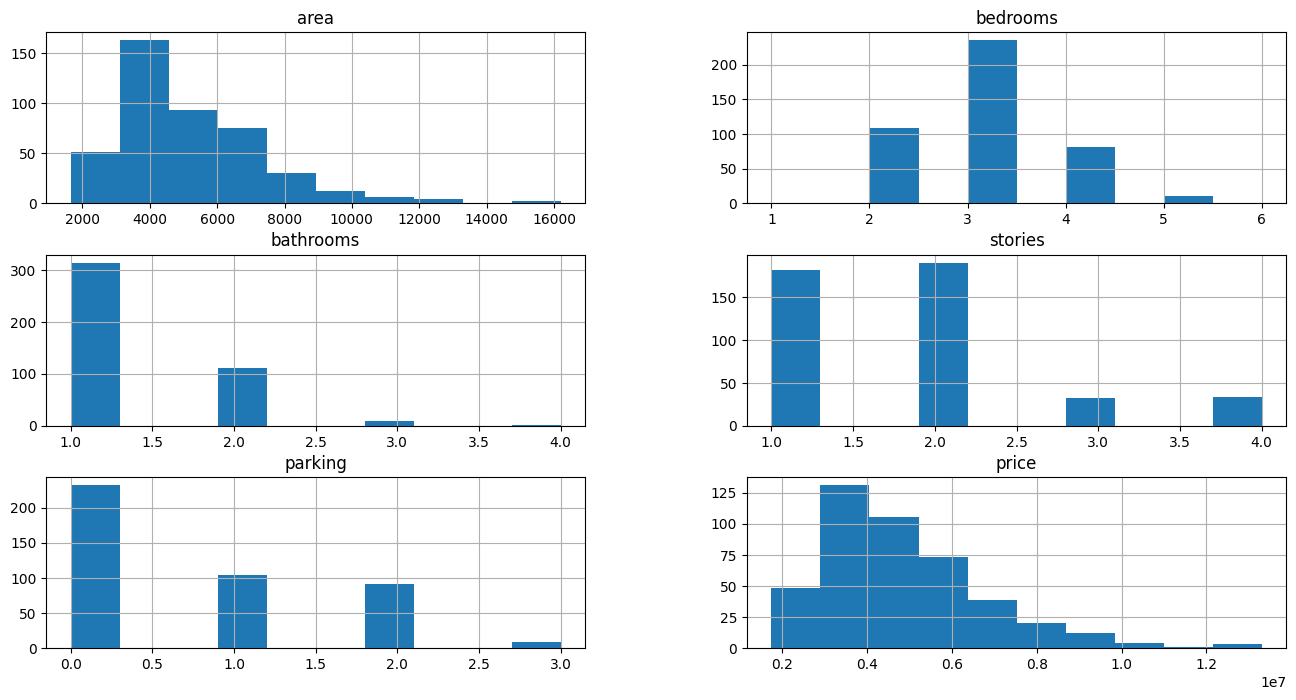

In [9]:
train_data.hist(figsize=(16, 8))

In [10]:
train_data['mainroad'] = train_data['mainroad'].map({"yes":1, "no": 0})
train_data['guestroom'] = train_data['guestroom'].map({"yes":1, "no": 0})
train_data['basement'] = train_data['basement'].map({"yes":1, "no": 0})
train_data['hotwaterheating'] = train_data['hotwaterheating'].map({"yes":1, "no": 0})
train_data['airconditioning'] = train_data['airconditioning'].map({"yes":1, "no": 0})
train_data['prefarea'] = train_data['prefarea'].map({"yes":1, "no": 0})



In [11]:
train_data = train_data.join(pd.get_dummies(train_data.furnishingstatus).astype(int)).drop(['furnishingstatus'], axis = 1)

In [12]:
train_data

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price,furnished,semi-furnished,unfurnished
282,2175,3,1,2,0,1,1,0,1,0,0,4270000,0,0,1
353,2856,3,1,3,1,0,0,0,0,0,1,3780000,1,0,0
393,7424,3,1,1,0,0,0,0,0,0,0,3500000,0,0,1
508,4400,2,1,1,1,0,0,0,0,0,0,2590000,0,0,1
489,3300,3,1,2,0,0,0,0,0,1,0,2835000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,5000,3,1,3,1,0,0,0,1,0,0,5740000,0,1,0
82,10500,3,2,1,1,0,1,0,1,1,1,6615000,1,0,0
213,4995,4,2,1,1,0,1,0,0,0,0,4893000,0,1,0
488,5200,4,1,3,1,0,0,0,0,0,0,2852500,0,0,1


<Axes: >

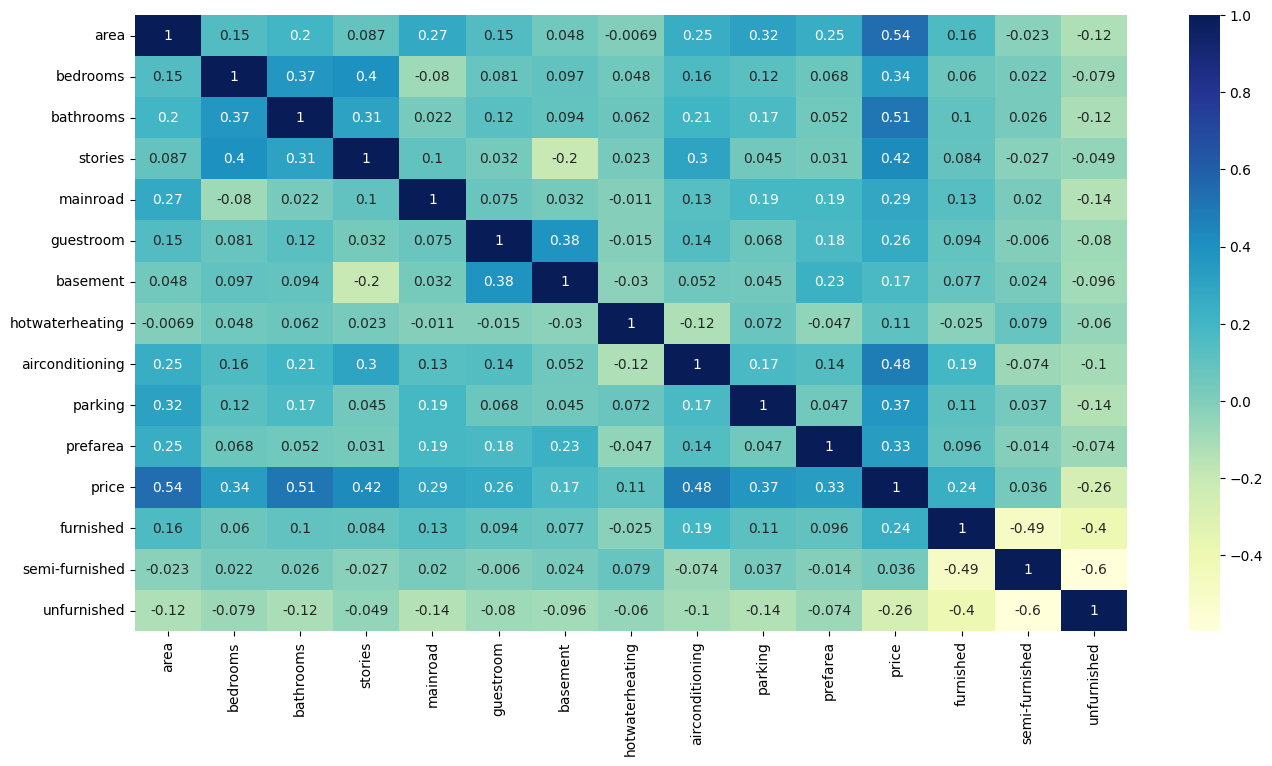

In [13]:
plt.figure(figsize=(16, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


In [14]:
train_data['bedrooms'] = np.log(train_data['bedrooms'] + 1)
train_data['bathrooms'] = np.log(train_data['bathrooms'] + 1)
train_data['stories'] = np.log(train_data['stories'] + 1)
train_data['parking'] = np.log(train_data['parking'] + 1)




array([[<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'stories'}>],
       [<Axes: title={'center': 'mainroad'}>,
        <Axes: title={'center': 'guestroom'}>,
        <Axes: title={'center': 'basement'}>,
        <Axes: title={'center': 'hotwaterheating'}>],
       [<Axes: title={'center': 'airconditioning'}>,
        <Axes: title={'center': 'parking'}>,
        <Axes: title={'center': 'prefarea'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'furnished'}>,
        <Axes: title={'center': 'semi-furnished'}>,
        <Axes: title={'center': 'unfurnished'}>, <Axes: >]], dtype=object)

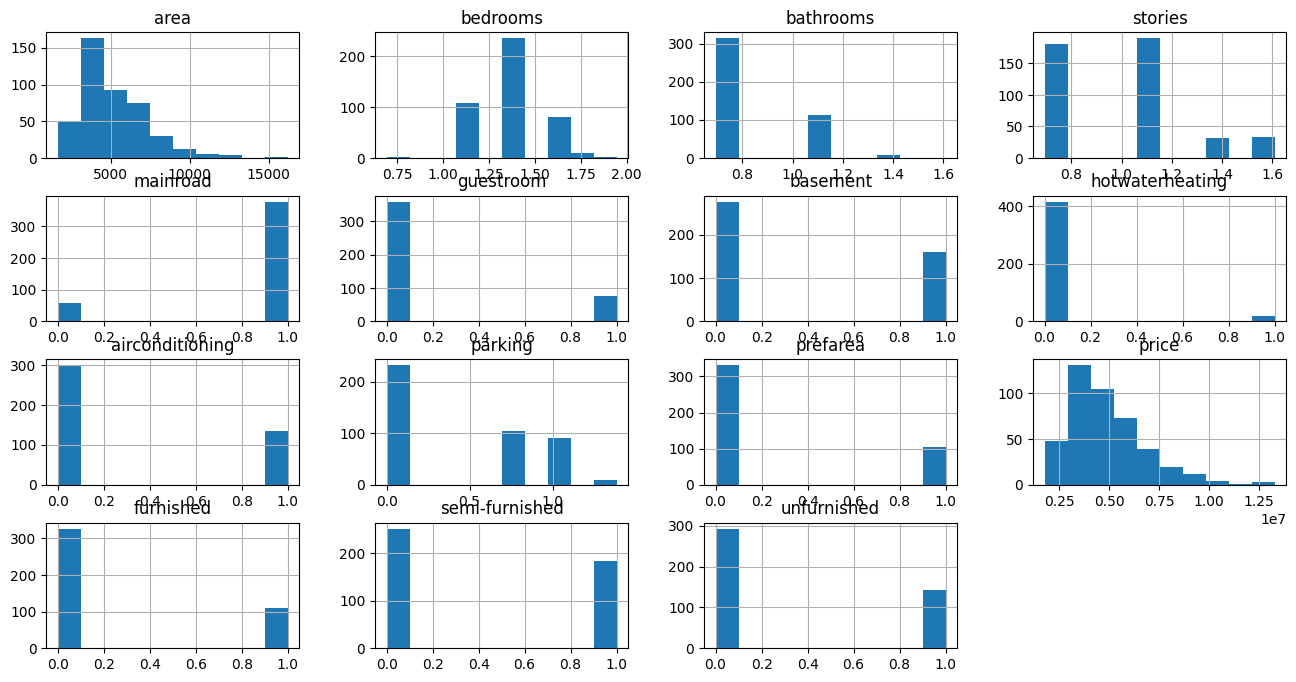

In [15]:
train_data.hist(figsize=(16, 8))

<Axes: >

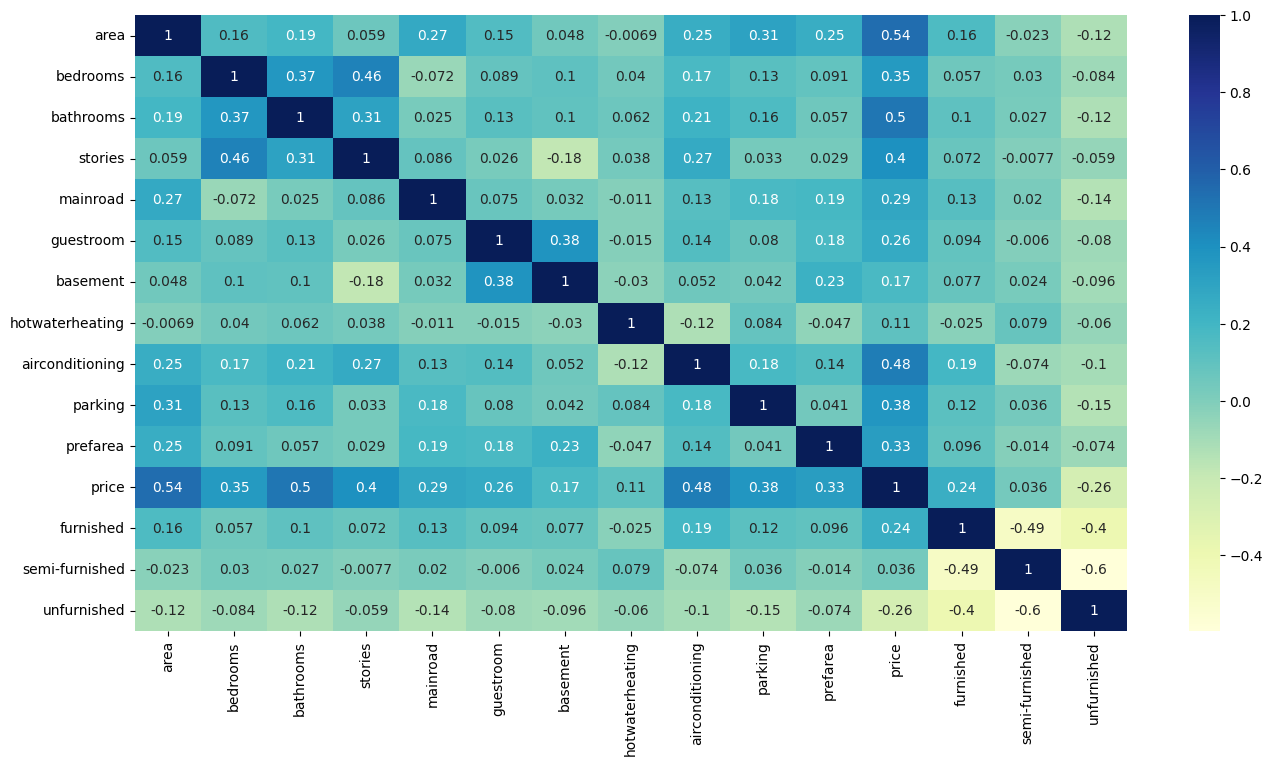

In [16]:
plt.figure(figsize=(16, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

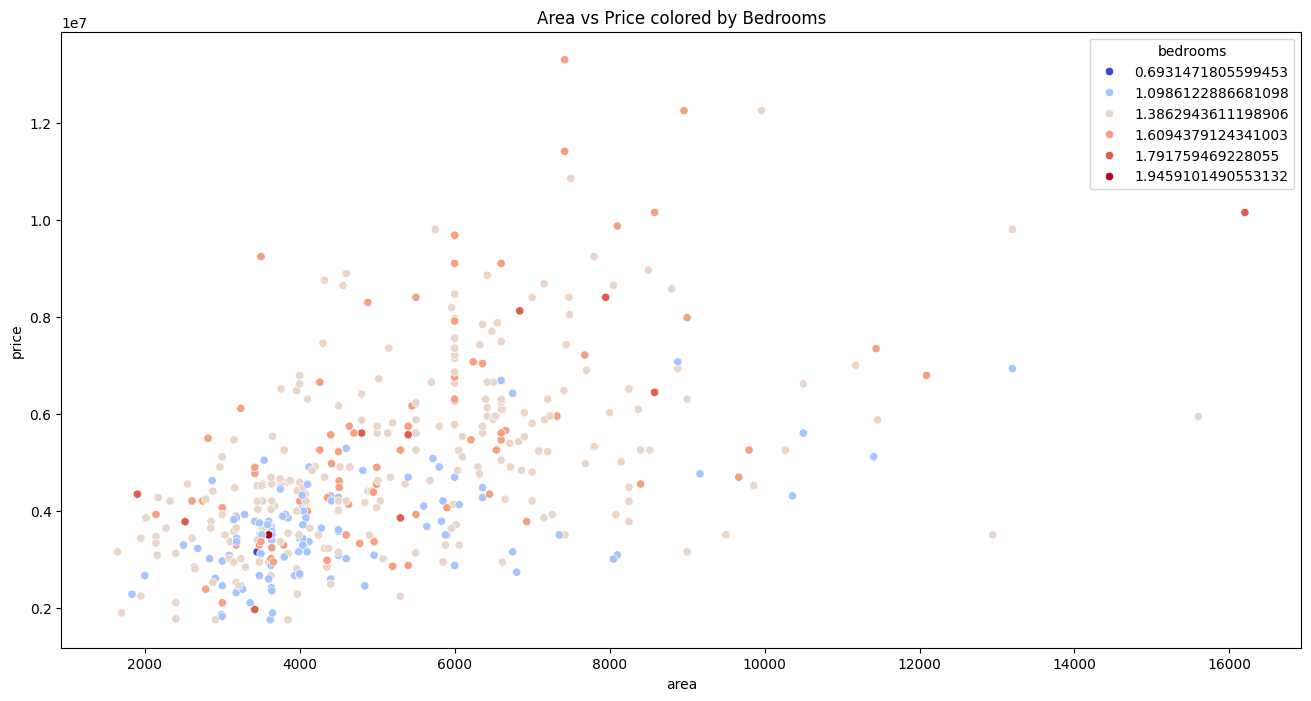

In [17]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x="area", y="price", data=train_data, hue="bedrooms", palette="coolwarm")
plt.title("Area vs Price colored by Bedrooms")
plt.show()


In [18]:
from sklearn.linear_model import LinearRegression

x_train, y_train = train_data.drop(["price"], axis=1), train_data["price"]


reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [27]:
test_data['mainroad'] = test_data['mainroad'].map({"yes": 1, "no": 0})
test_data['guestroom'] = test_data['guestroom'].map({"yes": 1, "no": 0})
test_data['basement'] = test_data['basement'].map({"yes": 1, "no": 0})
test_data['hotwaterheating'] = test_data['hotwaterheating'].map({"yes": 1, "no": 0})
test_data['airconditioning'] = test_data['airconditioning'].map({"yes": 1, "no": 0})
test_data['prefarea'] = test_data['prefarea'].map({"yes": 1, "no": 0})

# Логарифмическое преобразование
test_data['bedrooms'] = np.log(test_data['bedrooms'] + 1)
test_data['bathrooms'] = np.log(test_data['bathrooms'] + 1)
test_data['stories'] = np.log(test_data['stories'] + 1)
test_data['parking'] = np.log(test_data['parking'] + 1)


In [28]:
test_data

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,price
273,3500,1.609438,0.693147,1.098612,NaN,NaN,NaN,NaN,NaN,1.098612,NaN,True,False,False,4340000
190,7600,1.609438,0.693147,1.098612,NaN,NaN,NaN,NaN,NaN,1.098612,NaN,True,False,False,5040000
165,6450,1.386294,1.098612,0.693147,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,False,False,True,5383000
193,4800,1.098612,0.693147,0.693147,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,False,True,False,5033000
179,3180,1.386294,1.098612,1.098612,NaN,NaN,NaN,NaN,NaN,1.098612,NaN,False,True,False,5215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,3600,1.386294,0.693147,0.693147,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,True,False,False,4098500
255,5885,1.098612,0.693147,0.693147,NaN,NaN,NaN,NaN,NaN,0.693147,NaN,False,False,True,4480000
327,6480,1.386294,0.693147,1.098612,NaN,NaN,NaN,NaN,NaN,0.693147,NaN,False,True,False,3990000
117,3700,1.609438,0.693147,1.098612,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,True,False,False,5950000


In [29]:
print(test_data.columns)


Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus_furnished', 'furnishingstatus_semi-furnished',
       'furnishingstatus_unfurnished', 'price'],
      dtype='object')


In [35]:
print("Колонки x_train:", x_train.columns)
print("Колонки x_test:", x_test.columns)


Колонки x_train: Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnished', 'semi-furnished', 'unfurnished'],
      dtype='object')
Колонки x_test: Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnished', 'semi-furnished', 'unfurnished'],
      dtype='object')


In [32]:
x_test.rename(columns={
    'furnishingstatus_furnished': 'furnished',
    'furnishingstatus_semi-furnished': 'semi-furnished',
    'furnishingstatus_unfurnished': 'unfurnished'
}, inplace=True)


In [34]:
print("Колонки после переименования:")
print(x_test.columns)


Колонки после переименования:
Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnished', 'semi-furnished', 'unfurnished'],
      dtype='object')


In [38]:
columns_to_map = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in columns_to_map:
    if col in x_test.columns:
        x_test[col] = x_test[col].map({"yes": 1, "no": 0})


In [40]:
print(x_train.isnull().sum())
print(x_test.isnull().sum())


area               0
bedrooms           0
bathrooms          0
stories            0
mainroad           0
guestroom          0
basement           0
hotwaterheating    0
airconditioning    0
parking            0
prefarea           0
furnished          0
semi-furnished     0
unfurnished        0
dtype: int64
area               0
bedrooms           0
bathrooms          0
stories            0
mainroad           0
guestroom          0
basement           0
hotwaterheating    0
airconditioning    0
parking            0
prefarea           0
furnished          0
semi-furnished     0
unfurnished        0
dtype: int64


In [41]:
x_train.describe()


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
count,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.00000,436.000000,436.000000
mean,5197.538991,1.365483,0.813713,0.990066,0.866972,0.176606,0.366972,0.045872,0.311927,0.423252,0.240826,0.25000,0.422018,0.327982
std,2177.770704,0.187054,0.199072,0.287195,0.339995,0.381773,0.482533,0.209447,0.463812,0.477036,0.428076,0.43351,0.494449,0.470017
min,1650.000000,0.693147,0.693147,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,3630.000000,1.314374,0.693147,0.693147,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,4600.000000,1.386294,0.693147,1.098612,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,6405.000000,1.386294,1.098612,1.098612,1.000000,0.000000,1.000000,0.000000,1.000000,0.693147,0.000000,0.25000,1.000000,1.000000
max,16200.000000,1.945910,1.609438,1.609438,1.000000,1.000000,1.000000,1.000000,1.000000,1.386294,1.000000,1.00000,1.000000,1.000000


In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [43]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(reg, x_train, y_train, cv=5, scoring='r2')
print("Среднее R^2:", scores.mean())


Среднее R^2: 0.6519472351072194
